<a href="https://colab.research.google.com/github/mjakubowski99/airbnb_dataset/blob/main/AirBnB_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Poprawne załadowanie zbioru danych
Zbiór zawiera dane na temat rezerwacji poczynionych poprzez portal airbnb we włoskim mieście Milan

In [201]:
import numpy as np
import pandas as pd 

df = pd.read_csv("http://data.insideairbnb.com/italy/lombardy/milan/2022-09-14/data/listings.csv.gz")
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18208903,https://www.airbnb.com/rooms/18208903,20220914194812,2022-09-14,city scrape,Casa Caterina Parco Nord Milano,Beautiful apartment located in the green of Pa...,Public Transport to the Milano City Center at ...,https://a0.muscache.com/pictures/82aa607f-1230...,125703074,...,4.99,4.57,4.90,NaN,t,2,2,0,0,4.56
1,8780479,https://www.airbnb.com/rooms/8780479,20220914194812,2022-09-14,city scrape,bilocale zona expo/fiera rho,Appartamento bilocale moderno e funzionale con...,NaN,https://a0.muscache.com/pictures/111181219/85e...,46025048,...,5.00,4.27,3.55,NaN,f,2,2,0,0,0.13
2,34771515,https://www.airbnb.com/rooms/34771515,20220914194812,2022-09-14,city scrape,Bnbook-OlonaTriloB-Fiera Milano-Pero with high...,Comfortable 3-rooms apartment for 6 people in ...,The neighborhood is residential and supermarke...,https://a0.muscache.com/pictures/prohost-api/H...,28922333,...,4.50,4.00,4.00,NaN,t,11,11,0,0,0.19
3,604703529081024264,https://www.airbnb.com/rooms/604703529081024264,20220914194812,2022-09-14,city scrape,Appartamento incantevole in piccola corte a Rho,"Appartamento incantevole a Rho , completo di t...",NaN,https://a0.muscache.com/pictures/7ac02bb3-c285...,217593760,...,4.50,5.00,5.00,NaN,f,1,1,0,0,0.61
4,23138039,https://www.airbnb.com/rooms/23138039,20220914194812,2022-09-14,city scrape,Sesto centro,Delizioso appartamento ubicato al sesto ed ult...,"Sesto San Giovanni , in passato area dei grand...",https://a0.muscache.com/pictures/c1341a9f-4438...,51081158,...,5.00,4.75,4.80,T01025,f,2,2,0,0,0.42


# 2. Poznanie rozmiaru danych
Zbiór zawiera 19248 rekordów. Na wstępie widać już jak wiele wartości null ma np. kolumna nieghbourhood_overiew, neighbourhood a dla przykładu kolumny neighbourhood_group_cleansed, calendar_updated nie mają wogóle wartości.

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19248 entries, 0 to 19247
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            19248 non-null  int64  
 1   listing_url                                   19248 non-null  object 
 2   scrape_id                                     19248 non-null  int64  
 3   last_scraped                                  19248 non-null  object 
 4   source                                        19248 non-null  object 
 5   name                                          19239 non-null  object 
 6   description                                   18850 non-null  object 
 7   neighborhood_overview                         10627 non-null  object 
 8   picture_url                                   19248 non-null  object 
 9   host_id                                       19248 non-null 

# 3. Wyświetlenie próbki surowych danych w celu wyrobienia sobie wyobrażenia o nich

In [203]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18208903,https://www.airbnb.com/rooms/18208903,20220914194812,2022-09-14,city scrape,Casa Caterina Parco Nord Milano,Beautiful apartment located in the green of Pa...,Public Transport to the Milano City Center at ...,https://a0.muscache.com/pictures/82aa607f-1230...,125703074,...,4.99,4.57,4.90,NaN,t,2,2,0,0,4.56
1,8780479,https://www.airbnb.com/rooms/8780479,20220914194812,2022-09-14,city scrape,bilocale zona expo/fiera rho,Appartamento bilocale moderno e funzionale con...,NaN,https://a0.muscache.com/pictures/111181219/85e...,46025048,...,5.00,4.27,3.55,NaN,f,2,2,0,0,0.13
2,34771515,https://www.airbnb.com/rooms/34771515,20220914194812,2022-09-14,city scrape,Bnbook-OlonaTriloB-Fiera Milano-Pero with high...,Comfortable 3-rooms apartment for 6 people in ...,The neighborhood is residential and supermarke...,https://a0.muscache.com/pictures/prohost-api/H...,28922333,...,4.50,4.00,4.00,NaN,t,11,11,0,0,0.19
3,604703529081024264,https://www.airbnb.com/rooms/604703529081024264,20220914194812,2022-09-14,city scrape,Appartamento incantevole in piccola corte a Rho,"Appartamento incantevole a Rho , completo di t...",NaN,https://a0.muscache.com/pictures/7ac02bb3-c285...,217593760,...,4.50,5.00,5.00,NaN,f,1,1,0,0,0.61
4,23138039,https://www.airbnb.com/rooms/23138039,20220914194812,2022-09-14,city scrape,Sesto centro,Delizioso appartamento ubicato al sesto ed ult...,"Sesto San Giovanni , in passato area dei grand...",https://a0.muscache.com/pictures/c1341a9f-4438...,51081158,...,5.00,4.75,4.80,T01025,f,2,2,0,0,0.42


## Wstępna analiza wartości
Analiza ta miała na celu zdobycie informacji o przydatności atrybutów.
Wstępna analiza wykazała, że atrybut ma duzo wartosci null, być może przydatnym będzie przerobienie go na has_host_about z wartościami true, false

In [204]:
null_counts = df['host_about'].isnull().sum()

print("Liczba wartości null w kolumnie host_about: ", null_counts)

Liczba wartości null w kolumnie host_about:  8778


Zbiór danych posiada, też bardzo dużo kolumn typu id, url, które nie niosą ze sobą żadnych ciekawych informacji. Należy je jak najszybciej usunąć, żeby nie utrudniać sobie analizy. Lista takich kolumn:
'id', 'listing_url', 'scrape_id', 'last_scraped', 'picture_url', 'host_id', 'host_url', 'host_thumbnail_url', 'host_picture_url', 'calendar_last_scraped'

# 4. Weryfikacja i konwersja typów

Przeprowadzona poniżej konwersja typów miała na celu przekonwertowanie danych na bardziej przyjazne dla uczenia maszynowego oraz bardziej adekwatne do typów w języku python. 
1. Kolumny, które miały tylko dwie wartości ['t', 'f'] zostały zmapowane do typu boolean. 
2. Wartości procentowe zostały skonwertowane na typ float.
3. Cena również została przekonwertowana na typ float
4. Wykorzystano duże braki danych w kolumnach host_about oraz license i stworzono na ich podstawie takie kolumny jak has_host_about i has_license
5. Przekonwertowano wartości typu tekstowego na kategoryczne

In [205]:
#Mapowanie na boolean
df['host_is_superhost'] = df['host_is_superhost'].map({'t': True, 'f': False})
df['host_has_profile_pic'] = df['host_has_profile_pic'].map({'t': True, 'f': False})
df['host_identity_verified'] = df['host_identity_verified'].map({'t': True, 'f': False})
df['has_availability'] = df['has_availability'].map({'t': True, 'f': False})
df['instant_bookable'] = df['instant_bookable'].map({'t': True, 'f': False})

#Konwersja wartości typu object na float
df['price'] = df['price'].str.replace('[$,]', '', regex=True).astype(np.float64)
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype(np.float64)/100
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(np.float64)/100
df['bathrooms'] = np.where(
    df.bathrooms_text.str.contains('half', case=False, regex=False, na=False),
    0.5,
    df.bathrooms_text.str.split().str[0]
).astype(np.float64)

#Wykorzystanie istniejących kolumn w celu uzyskania przydatniejszych
df['has_license'] = df['license'].notna()
df['has_host_about'] = df['host_about'].notnull()

#Konwersja na typ daty
df['host_since']  = pd.to_datetime(df['host_since'])
df['last_review'] = pd.to_datetime(df['last_review'])
df['first_review'] = pd.to_datetime(df['first_review'])

#Konwersja na typ kategoryczny
df['host_response_time'] = df['host_response_time'].astype('category')
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].astype('category')
df['source'] = df['source'].astype('category')
df['room_type'] = df['room_type'].astype('category')
df['property_type'] = df['property_type'].astype('category')
df['host_location'] = df['host_location'].astype('category')

#Konwersja na tablice
import json
df['amenities'] = df['amenities'].apply(json.loads)
df['host_verifications'] = df['host_verifications'].str[1:-1].replace("[' ]", '', regex=True).str.split(',')

### Usunięcie nieużywanych kolumn
Usunięto kolumny typu id, takie, które nie mają żadnych wartości oraz kolumny host_about oraz license, z których stworzono przydatniejsze kolumny.

In [206]:
df = df.drop(columns=[
    'id', 'calendar_updated', 'listing_url', 'scrape_id', 
    'last_scraped', 'picture_url', 'host_id', 'host_url', 
    'host_thumbnail_url', 'host_picture_url', 'calendar_last_scraped', 
    'license', 'host_about', 'neighbourhood_group_cleansed',
    'bathrooms_text'
])

Podejrzenie typów danych po konwersji

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19248 entries, 0 to 19247
Data columns (total 62 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   source                                        19248 non-null  category      
 1   name                                          19239 non-null  object        
 2   description                                   18850 non-null  object        
 3   neighborhood_overview                         10627 non-null  object        
 4   host_name                                     19248 non-null  object        
 5   host_since                                    19248 non-null  datetime64[ns]
 6   host_location                                 16338 non-null  category      
 7   host_response_time                            14829 non-null  category      
 8   host_response_rate                            14829 non-null  floa

#5. Zbudowanie podsumowania zmiennych numerycznych opisujących zbiór

Podsumowanie dla zmiennych numerycznych

In [208]:
import numpy as np

df.describe(include=[np.number])

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,14829.000000,15468.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19230.000000,17773.000000,18958.000000,...,15243.000000,15242.000000,15244.000000,15242.000000,15242.000000,19248.000000,19248.000000,19248.000000,19248.000000,15446.000000
mean,0.914582,0.795642,29.202930,40.099958,45.471468,9.187121,2.987583,1.144592,1.238620,1.785315,...,4.687698,4.792353,4.796131,4.696127,4.583304,19.057980,18.126974,0.843360,0.071384,1.228552
std,0.211679,0.305834,122.149677,235.781775,0.022864,0.032302,1.468500,0.428805,0.559885,1.124526,...,0.487629,0.425034,0.429156,0.420202,0.499862,62.752146,62.592885,4.215149,0.636677,1.724719
min,0.000000,0.000000,1.000000,1.000000,45.374760,9.025800,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,0.950000,0.690000,1.000000,1.000000,45.454119,9.168850,2.000000,1.000000,1.000000,1.000000,...,4.590000,4.770000,4.780000,4.580000,4.500000,1.000000,1.000000,0.000000,0.000000,0.162500
50%,1.000000,0.970000,2.000000,2.000000,45.470833,9.186259,2.000000,1.000000,1.000000,1.000000,...,4.850000,4.940000,4.950000,4.810000,4.705000,1.000000,1.000000,0.000000,0.000000,0.570000
75%,1.000000,1.000000,6.000000,7.000000,45.487350,9.209892,4.000000,1.000000,1.000000,2.000000,...,5.000000,5.000000,5.000000,5.000000,4.880000,4.000000,3.000000,0.000000,0.000000,1.560000
max,1.000000,1.000000,1446.000000,20000.000000,45.548560,9.294170,16.000000,20.000000,20.000000,40.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,410.000000,410.000000,49.000000,13.000000,31.200000


Podsumowanie dla zmiennych kategorycznych

In [209]:
df.describe(include=['object'])

,name,description,neighborhood_overview,host_name,host_neighbourhood,host_verifications,neighbourhood,amenities
count,19239,18850,10627,19248,11297,19248,10627,19248
unique,18859,18281,9616,2928,81,7,89,17632
top,GIOVENALE ROOMS – MILANO PORTA LUDOVICA,"Located in Porta Ludovica, Giovenale Rooms is ...",Giovenale Rooms is in a central location and i...,Andrea,Centro Storico,"[email, phone]","Milano, Lombardia, Italy",[Long term stays allowed]
freq,95,95,95,537,1821,15225,9390,54


# 6. Zbudowanie podsumowania braków w zbiorze danych w postaci wykresów

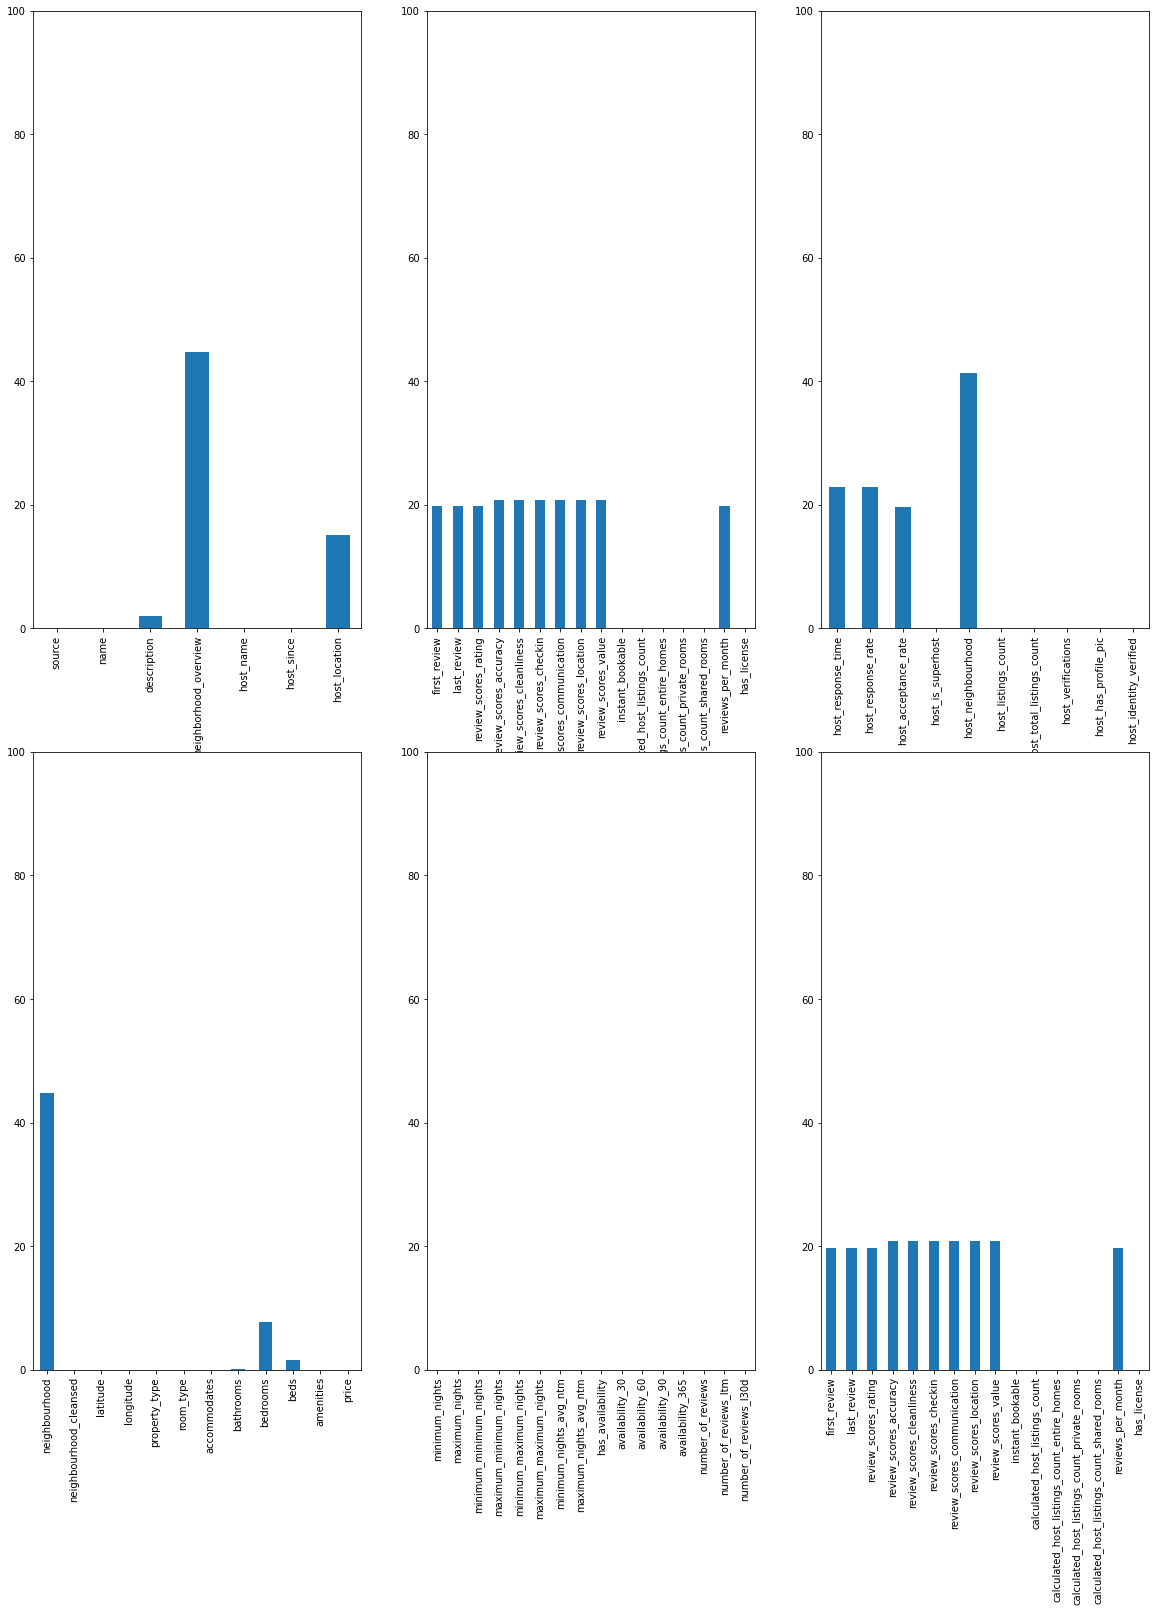

In [210]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,25))
percent_missing = df.isnull().sum() * 100 / len(df)

percent_missing['source':'host_location'].plot(kind='bar',ylim=(0,100), ax=axes[0,0])
percent_missing['host_response_time':'host_identity_verified'].plot(kind='bar',ylim=(0,100), ax=axes[0,2])
percent_missing['neighbourhood':'price'].plot(kind='bar',ylim=(0,100), ax=axes[1,0])
percent_missing['minimum_nights':'number_of_reviews_l30d'].plot(kind='bar',ylim=(0,100), ax=axes[1,1])
percent_missing['first_review':'has_license'].plot(kind='bar',ylim=(0,100), ax=axes[0,1])
percent_missing['first_review':'has_license'].plot(kind='bar',ylim=(0,100), ax=axes[1,2])

Jak widać pola neighbourhood, neighbourhood_overview, host_neighbourhood, mają ponad 40% brakujących wartości.

# 7. Wizualizacja rozkładu (wybranych) zmiennych 
Stworzenie histogramu dla wszyskich kolumn liczbowych oraz wartości kategorycznych, które nie mają za dużo wartości unikalnych

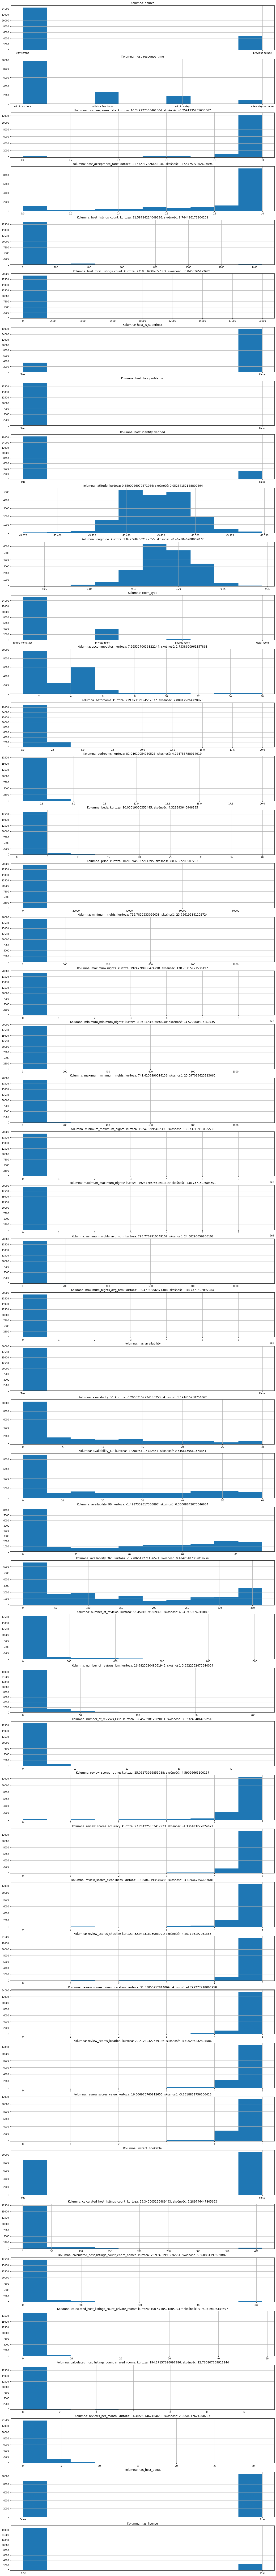

In [211]:
import matplotlib.pyplot as plt

def plot_hist(df):
  columns = [
    'source', 'host_response_time', 'host_response_rate', 
    'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 
    'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
    'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
    'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
    'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
    'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
    'availability_30', 'availability_60', 'availability_90', 'availability_365',
    'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating',
    'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location', 'review_scores_value',
    'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
    'reviews_per_month', 'has_host_about', 'has_license'
  ]

  col_count = len(columns)
  fig, ax = plt.subplots(ncols=1, nrows=len(columns), figsize=(20,200))

  for i, col in enumerate(columns):
    if df[col].dtype == "bool":
      df[col].map({True: "True", False: "False"}).hist(ax=ax[i])
    else:
      df[col].hist(ax=ax[i])

    if df[col].dtype == "int64" or df[col].dtype == "float64":
      title = "Kolumna: "+col+": kurtoza: "+str(df[col].kurt(skipna = True))+": skośność: "+str(df[col].skew(skipna = True))
    else:
      title = "Kolumna: "+col
    ax[i].set_title(title)

plot_hist(df)

#8. Oczyszczanie danych

Usunięcie kolumn, które mają powyżej 40% brakujących danych

In [212]:
for column in df.columns:
  if percent_missing[column] > 40:
    df.drop(columns=[column])

## Wypełnienie reszty brakujących wartości

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19248 entries, 0 to 19247
Data columns (total 62 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   source                                        19248 non-null  category      
 1   name                                          19239 non-null  object        
 2   description                                   18850 non-null  object        
 3   neighborhood_overview                         10627 non-null  object        
 4   host_name                                     19248 non-null  object        
 5   host_since                                    19248 non-null  datetime64[ns]
 6   host_location                                 16338 non-null  category      
 7   host_response_time                            14829 non-null  category      
 8   host_response_rate                            14829 non-null  floa

In [214]:
for column in df.select_dtypes(include='number'):
  if percent_missing[column] < 40:
    df[column].fillna(df[column].median(), inplace=True)

Stworzenie boxplotów, które będą pomocne w wypełnieniu reszty wartości 

<ipython-input-215-b0cd9757c4c3>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-215-b0cd9757c4c3>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-215-b0cd9757c4c3>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-215-b0cd9757c4c3>:4: Runt

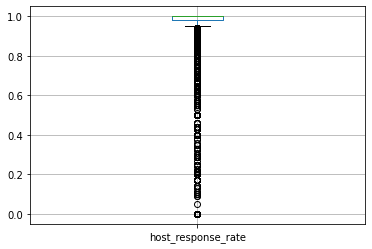

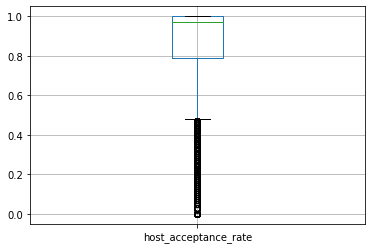

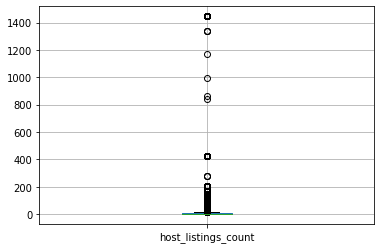

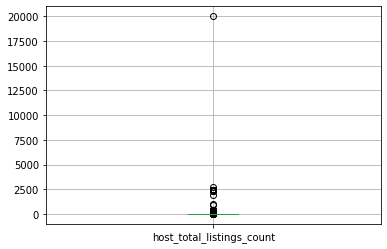

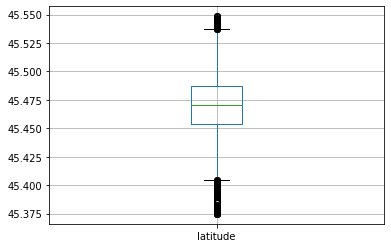

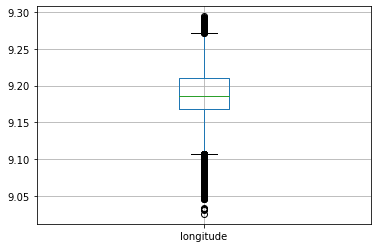

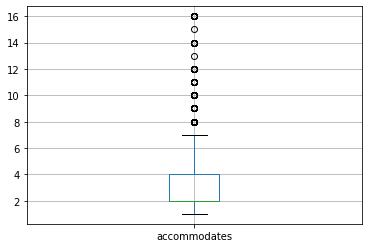

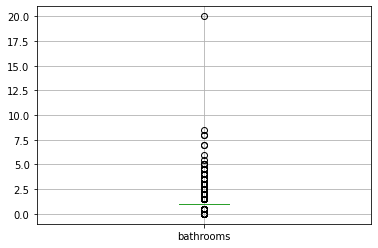

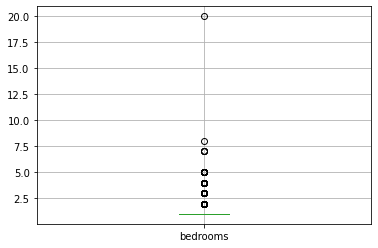

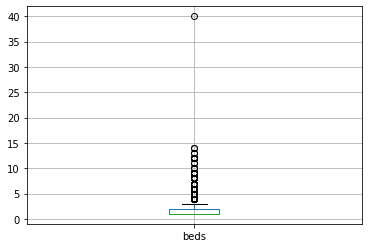

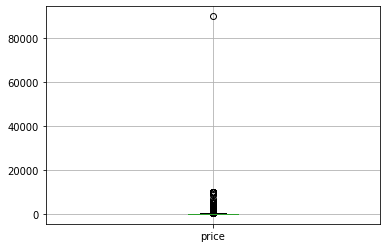

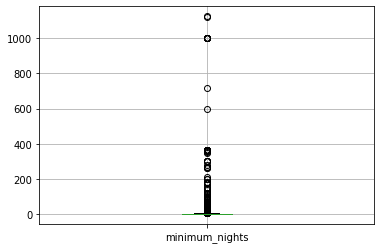

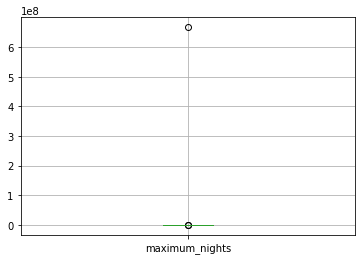

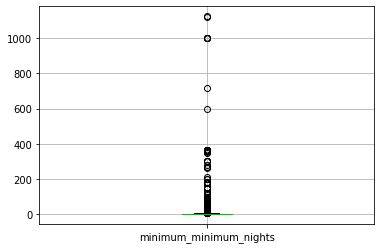

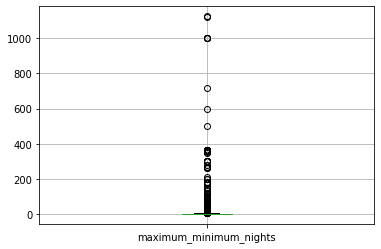

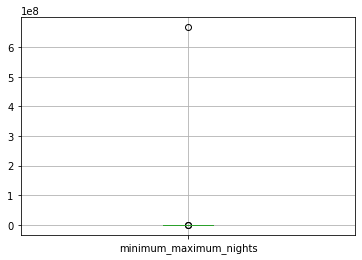

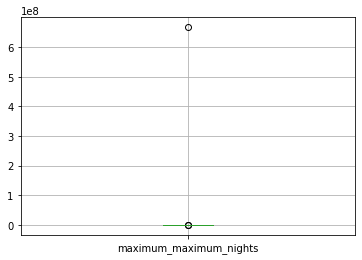

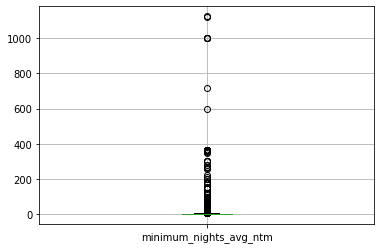

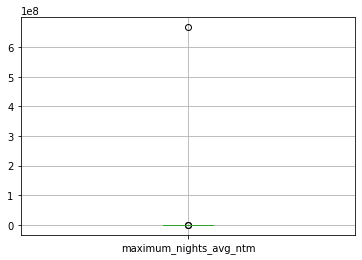

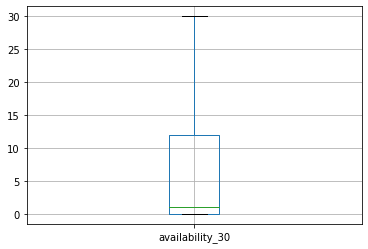

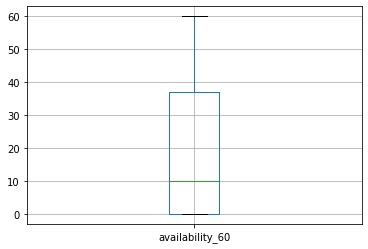

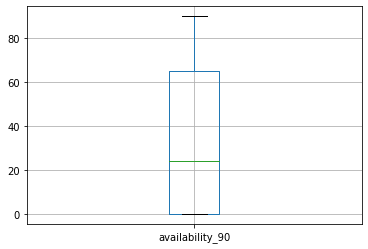

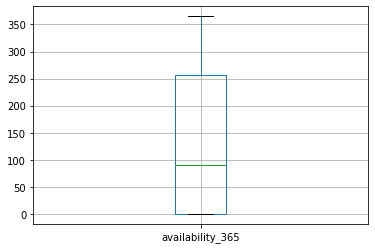

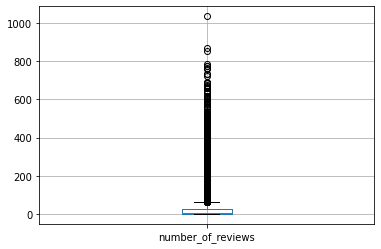

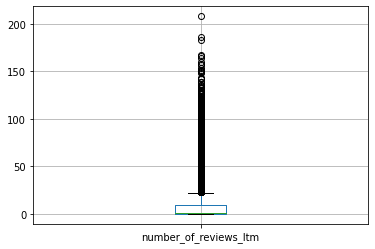

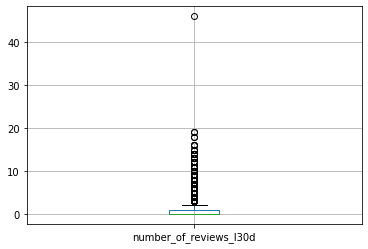

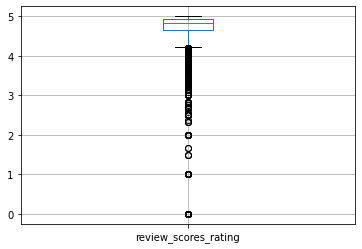

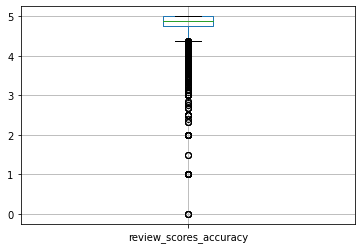

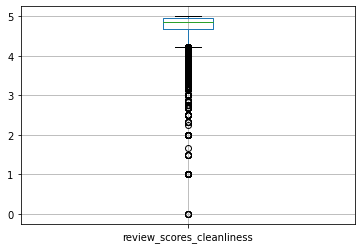

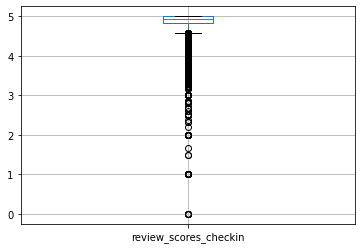

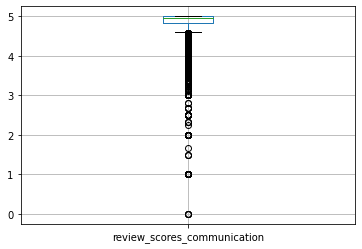

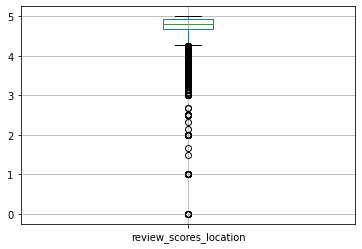

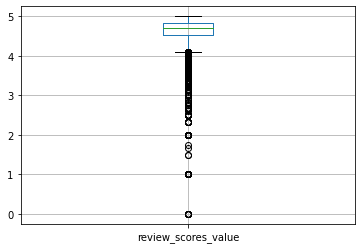

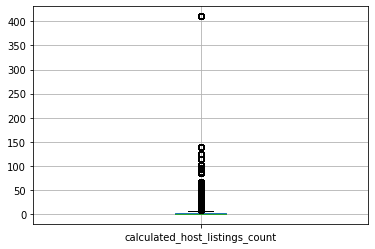

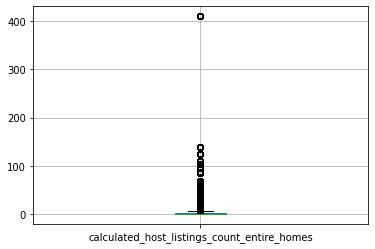

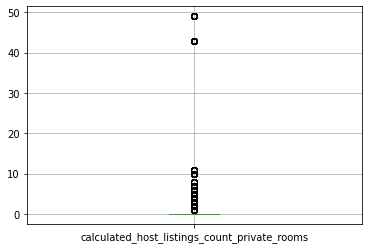

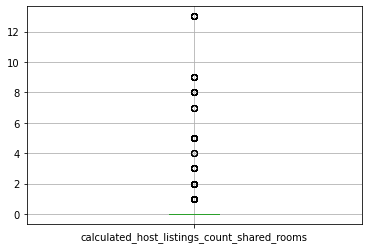

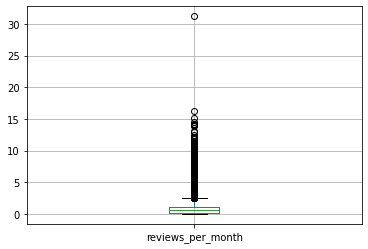

In [215]:
import matplotlib.pyplot as plt

for column in df.select_dtypes(include='number'):
    plt.figure()
    df.boxplot([column])

Uzupełnienie brakujących wartości numerycznych

In [216]:
for column in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    df[column] = df[column].where(df[column] < upper_bound, upper_bound)
    df[column] = df[column].where(df[column] > lower_bound, lower_bound)

Ponowne wyświetlenie boxplotów

<ipython-input-218-b0cd9757c4c3>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-218-b0cd9757c4c3>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-218-b0cd9757c4c3>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-218-b0cd9757c4c3>:4: Runt

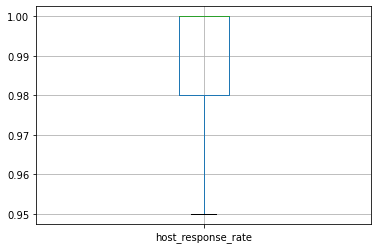

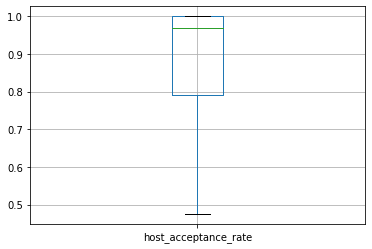

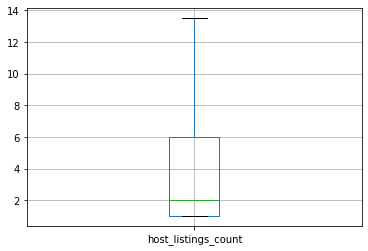

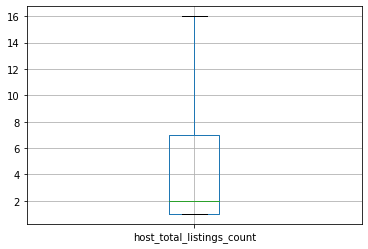

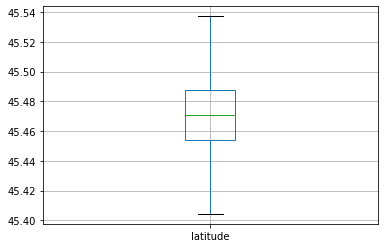

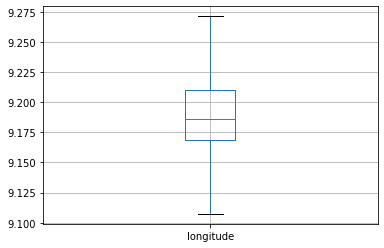

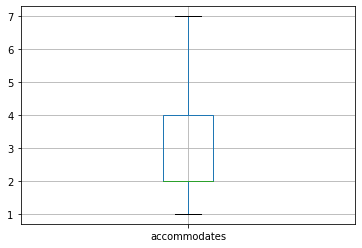

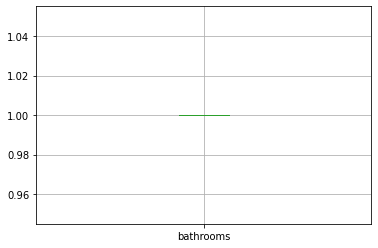

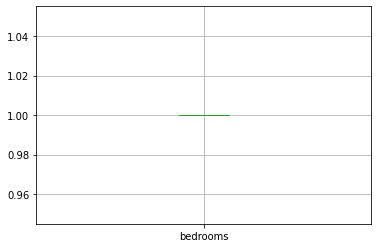

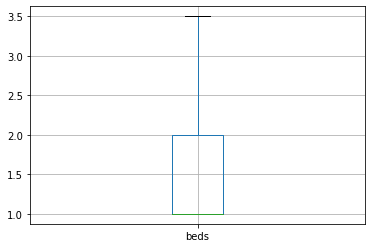

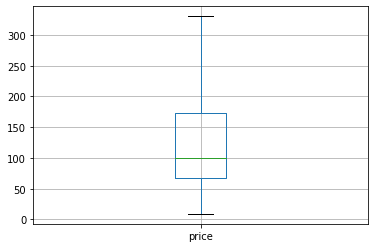

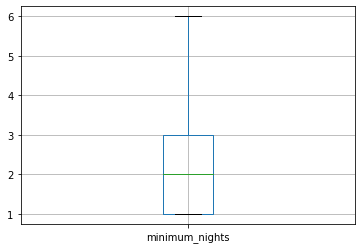

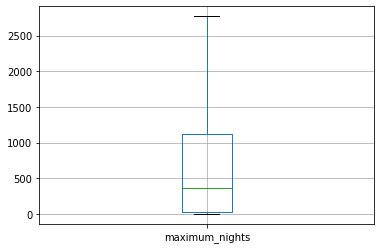

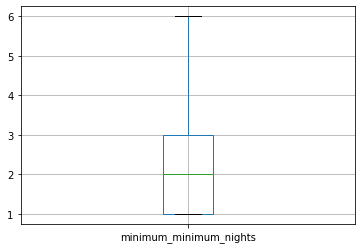

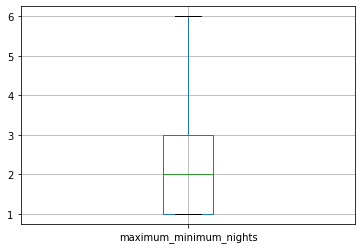

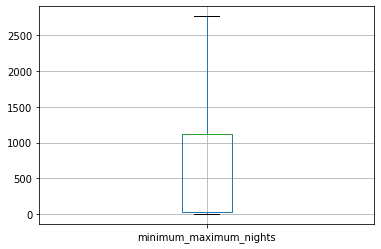

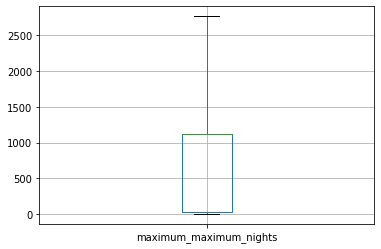

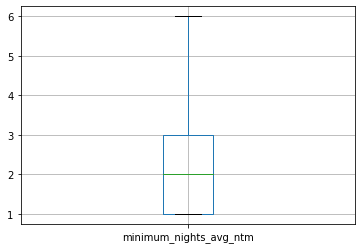

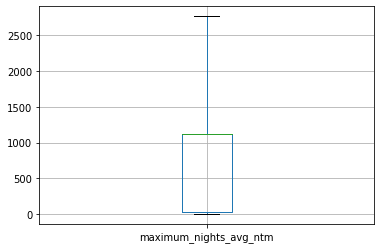

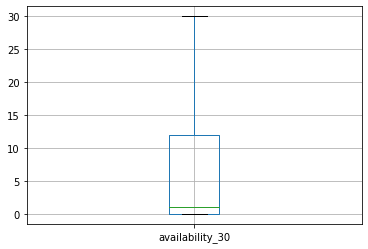

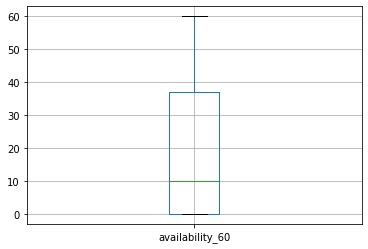

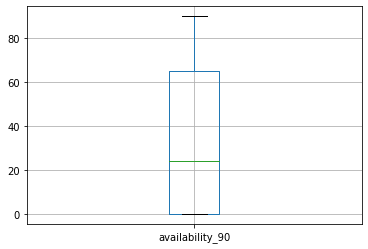

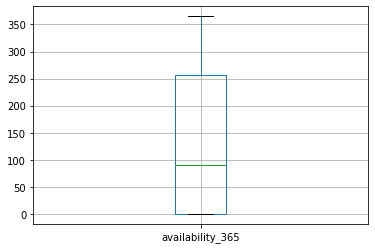

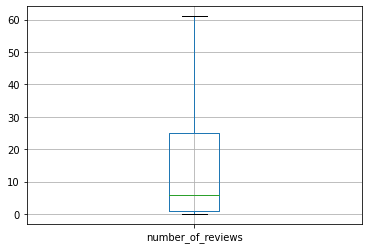

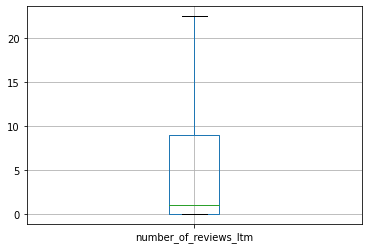

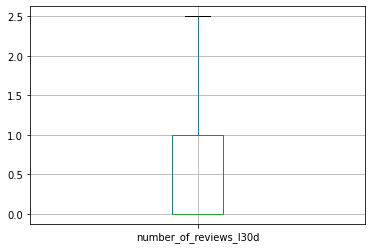

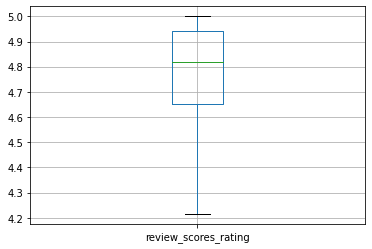

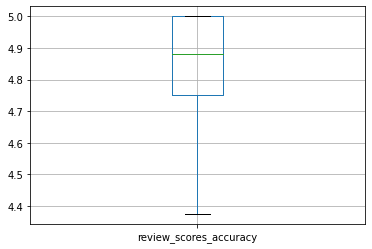

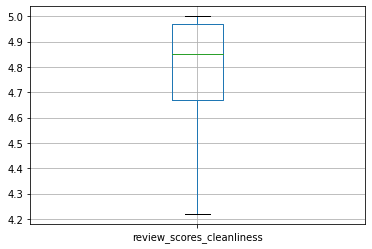

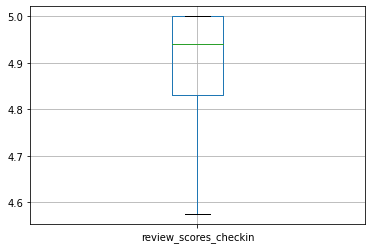

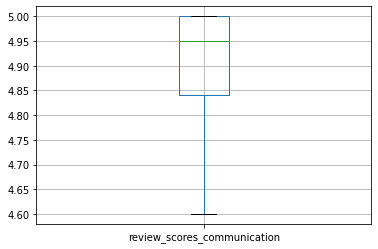

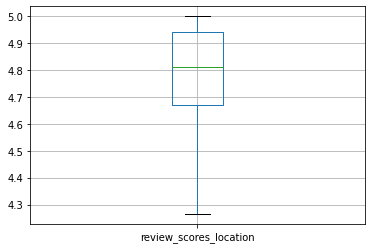

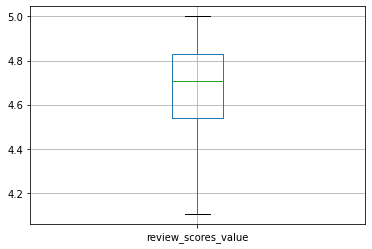

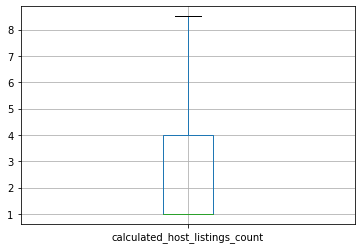

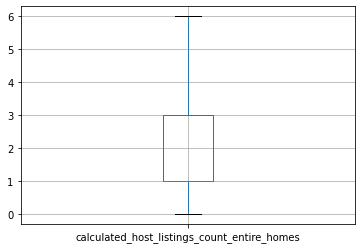

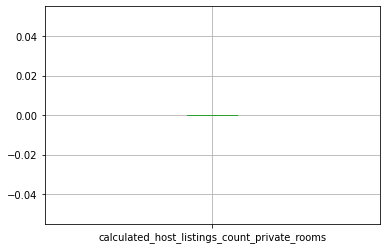

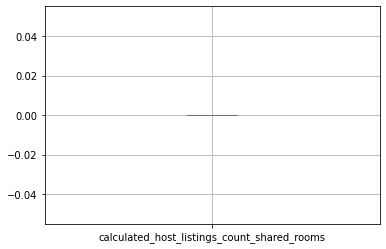

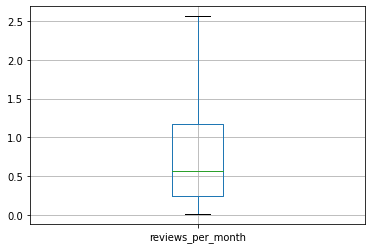

In [218]:
import matplotlib.pyplot as plt

for column in df.select_dtypes(include='number'):
    plt.figure()
    df.boxplot([column])

# 9. Analiza powiązań pomiędzy atrybutami

In [221]:
pd.set_option('display.max_rows', None)

df_corr = df.corr(method='spearman')
data = df_corr.abs().where(df_corr > 0.6).stack().reset_index()
data.sort_values(by=0)

,level_0,level_1,0
79,review_scores_rating,review_scores_checkin,0.608917
91,review_scores_checkin,review_scores_rating,0.608917
75,number_of_reviews_l30d,reviews_per_month,0.612318
113,reviews_per_month,number_of_reviews_l30d,0.612318
87,review_scores_accuracy,review_scores_value,0.623107
101,review_scores_value,review_scores_accuracy,0.623107
95,review_scores_communication,review_scores_rating,0.627484
80,review_scores_rating,review_scores_communication,0.627484
85,review_scores_accuracy,review_scores_checkin,0.631337
92,review_scores_checkin,review_scores_accuracy,0.631337


Analiza powiązań pokazuje, że najbardziej powiązane są kolumny z podobnymi wartościami jak np. availability_60 jest skorelowane z availability_30 na poziomie 93%, więc wartości z największymi powiązaniami nie wydają się tutaj ciekawe. Z ciekawszych powiązań: atrybut instant_bookable(True,False) jest powiązany z atrybutem host_acceptance_rate na poziomie 60%, lecz jest to i tak dosyć słaba korelacja. Również kolumna beds, jest wysoce powiązana z accomodates.

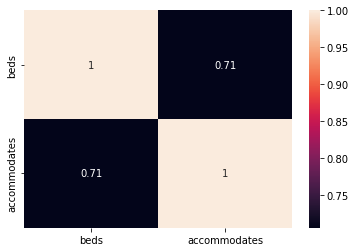

In [230]:
import seaborn as sns

sns.heatmap(pd.DataFrame({'beds': df['beds'], 'accommodates': df['accommodates']}).corr(), annot = True)

## Wyświetlenie heatmapy dla całej tabeli

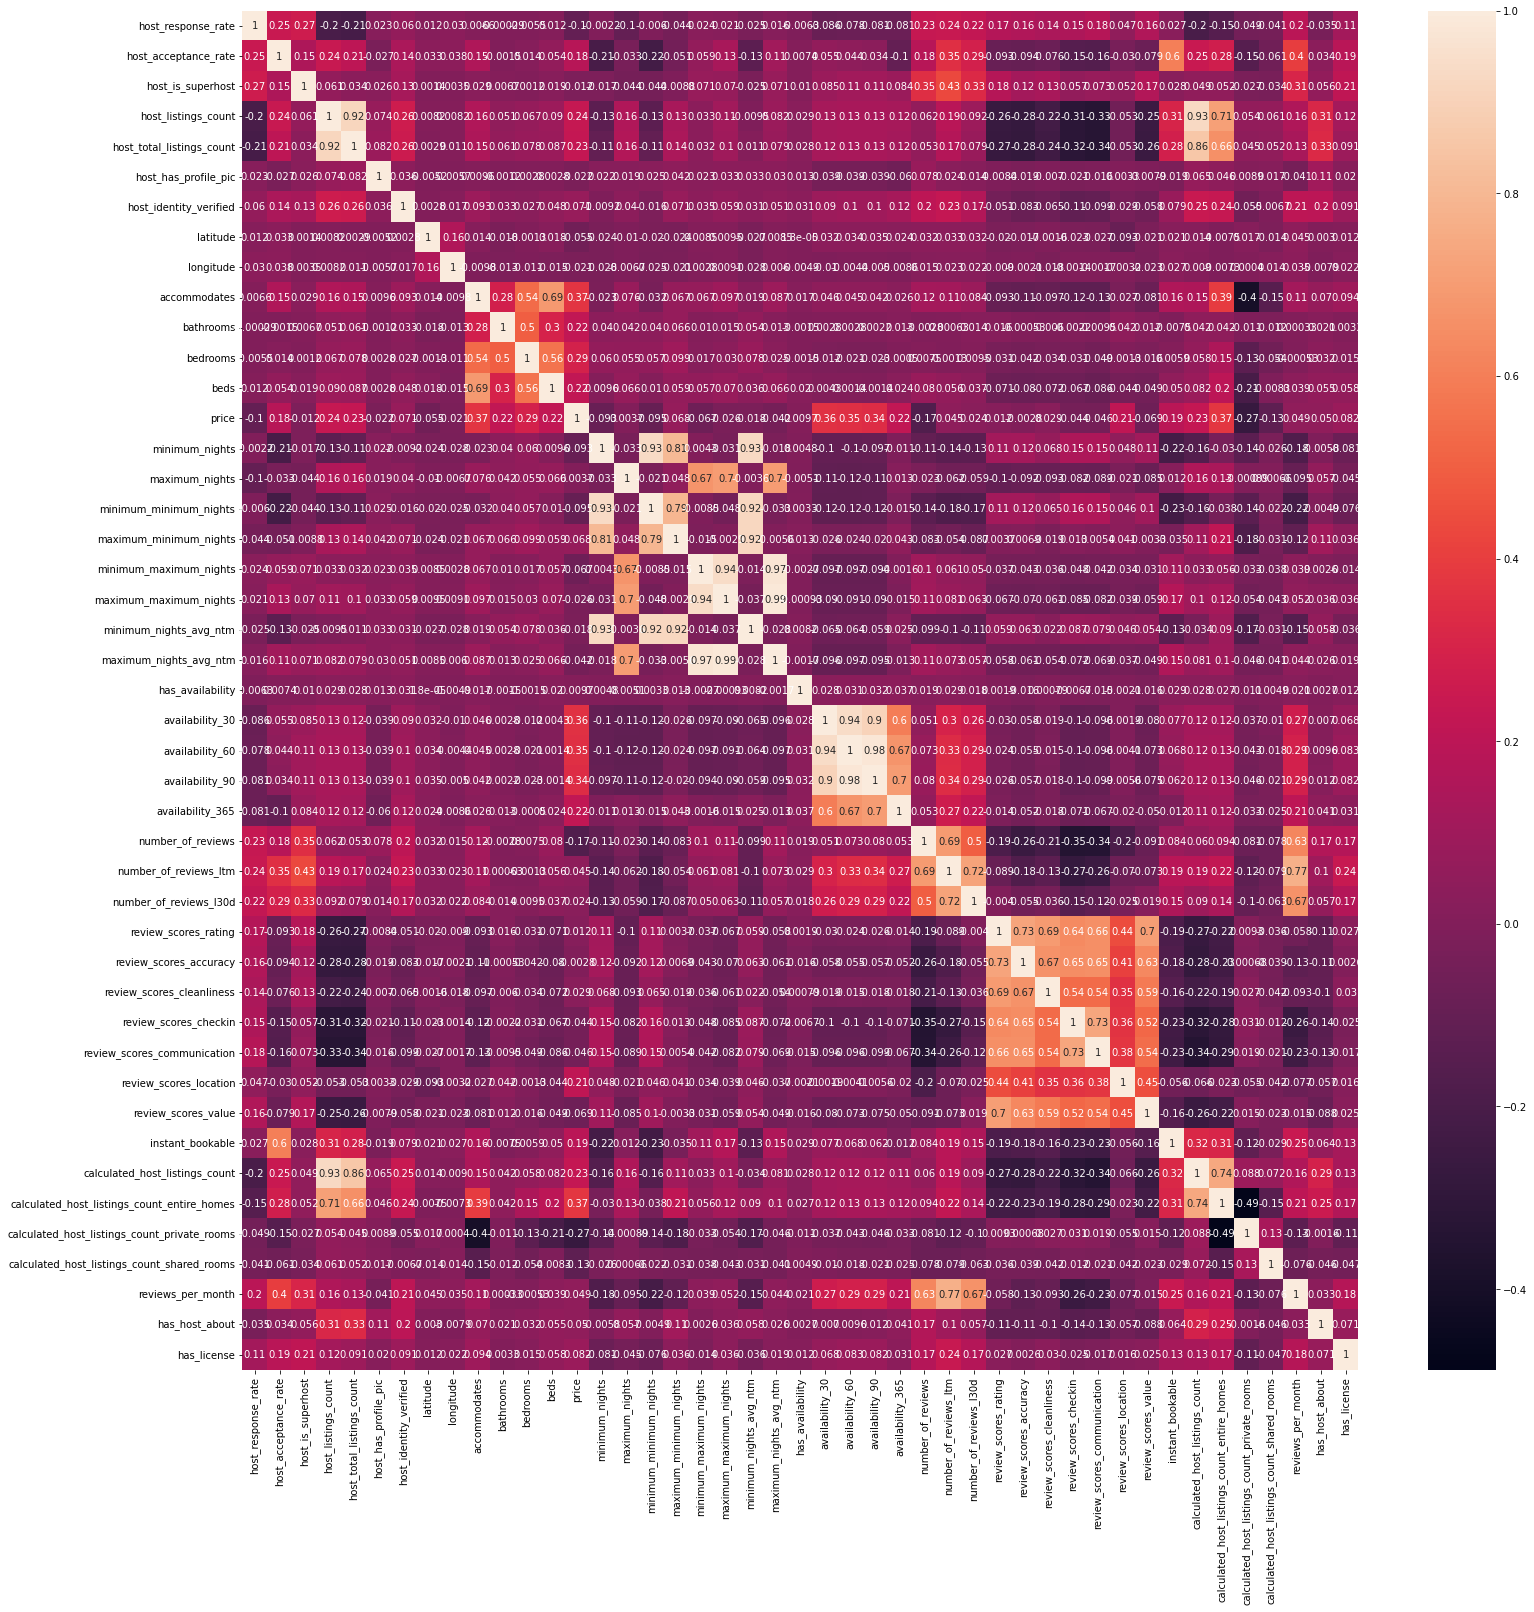

In [ ]:
import seaborn as sns

plt.figure(figsize=(25,25))
sns.heatmap(df_corr, annot = True)